In [ ]:
pip install optuna

In [105]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier

import optuna
from optuna.pruners import MedianPruner

import warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [4]:
from preprocessingHelper import PreprocessingHelper

In [3]:
df = pd.read_csv("diabetes.csv")

In [5]:
pp=PreprocessingHelper(dataframe=df)

# Data Analysis and Preprocessing


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# @title df describe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
cat_cols,cat_but_car,num_cols=pp.grabColNames()

Observations = 768

Variables = 9

categorical columns = 1

categorical but cardinal columns = 0

numerical columns = 8

numerical but categorical columns = 1



             count      mean       std  min   5%  10%  20%  30%  40%  50%  \
Pregnancies  768.0  3.845052  3.369578  0.0  0.0  0.0  1.0  1.0  2.0  3.0   

             60%  70%  80%  90%   95%   99%   max  
Pregnancies  4.0  5.0  7.0  9.0  10.0  13.0  17.0  



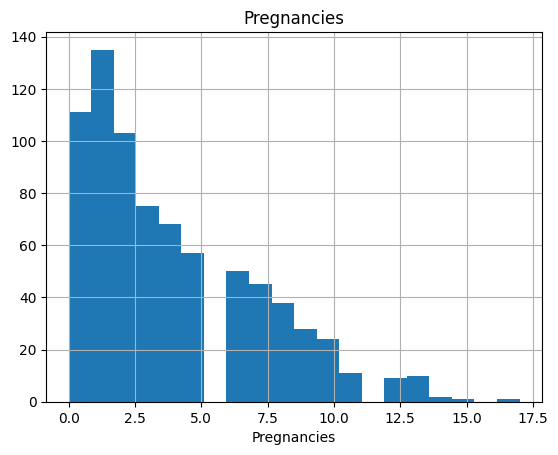

         count        mean        std  min    5%   10%   20%    30%    40%  \
Glucose  768.0  120.894531  31.972618  0.0  79.0  85.0  95.0  102.0  109.0   

           50%    60%    70%    80%    90%    95%    99%    max  
Glucose  117.0  125.0  134.0  147.0  167.0  181.0  196.0  199.0  



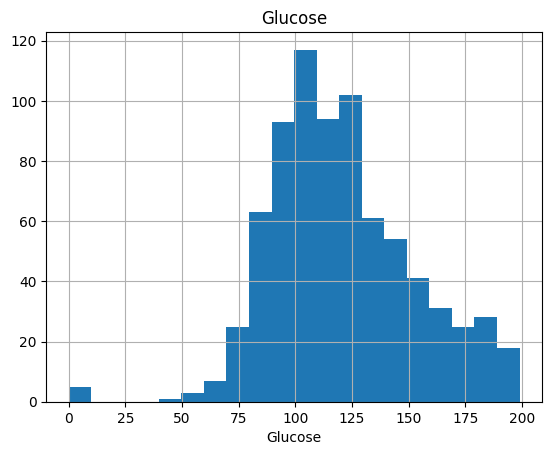

               count       mean        std  min    5%   10%   20%   30%   40%  \
BloodPressure  768.0  69.105469  19.355807  0.0  38.7  54.0  60.0  64.0  68.0   

                50%   60%   70%   80%   90%   95%    99%    max  
BloodPressure  72.0  74.0  78.0  82.0  88.0  90.0  106.0  122.0  



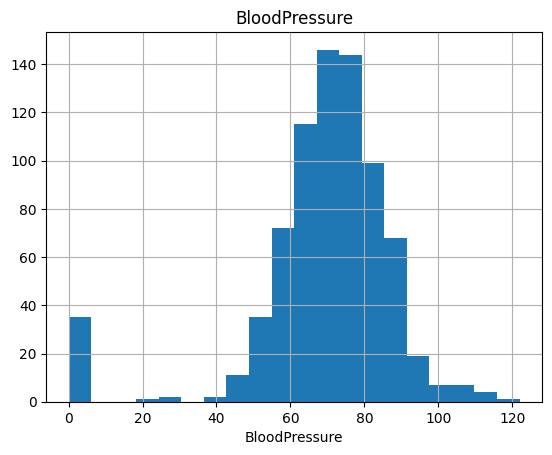

               count       mean        std  min   5%  10%  20%  30%   40%  \
SkinThickness  768.0  20.536458  15.952218  0.0  0.0  0.0  0.0  8.2  18.0   

                50%   60%   70%   80%   90%   95%    99%   max  
SkinThickness  23.0  27.0  31.0  35.0  40.0  44.0  51.33  99.0  



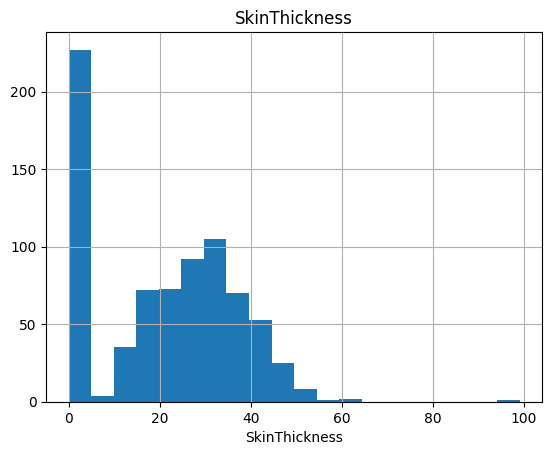

         count       mean         std  min   5%  10%  20%  30%  40%   50%  \
Insulin  768.0  79.799479  115.244002  0.0  0.0  0.0  0.0  0.0  0.0  30.5   

          60%    70%    80%    90%    95%    99%    max  
Insulin  72.2  106.0  150.0  210.0  293.0  519.9  846.0  



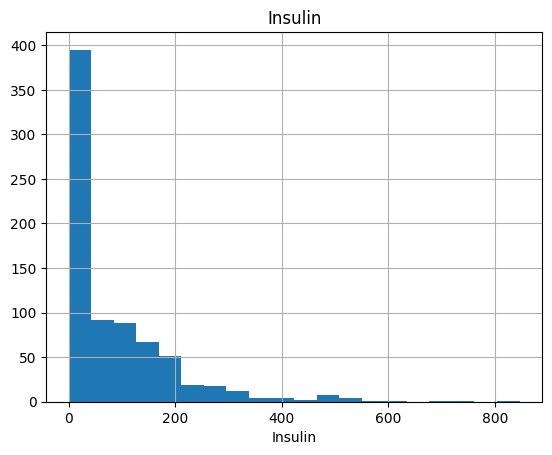

     count       mean      std  min    5%   10%   20%   30%   40%   50%   60%  \
BMI  768.0  31.992578  7.88416  0.0  21.8  23.6  25.9  28.2  30.1  32.0  33.7   

       70%   80%   90%     95%     99%   max  
BMI  35.49  37.8  41.5  44.395  50.759  67.1  



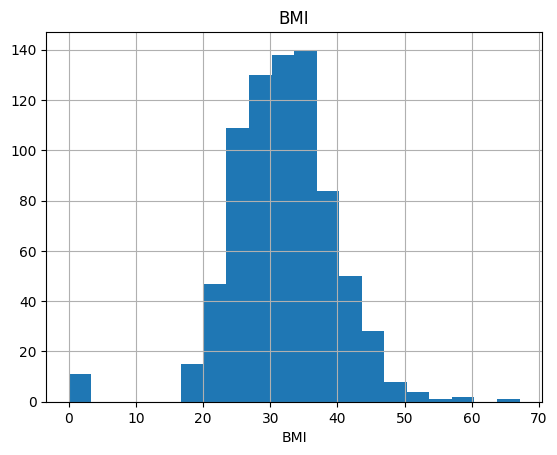

                          count      mean       std    min       5%    10%  \
DiabetesPedigreeFunction  768.0  0.471876  0.331329  0.078  0.14035  0.165   

                             20%    30%     40%     50%     60%     70%  \
DiabetesPedigreeFunction  0.2194  0.259  0.3028  0.3725  0.4542  0.5637   

                            80%     90%      95%      99%   max  
DiabetesPedigreeFunction  0.687  0.8786  1.13285  1.69833  2.42  



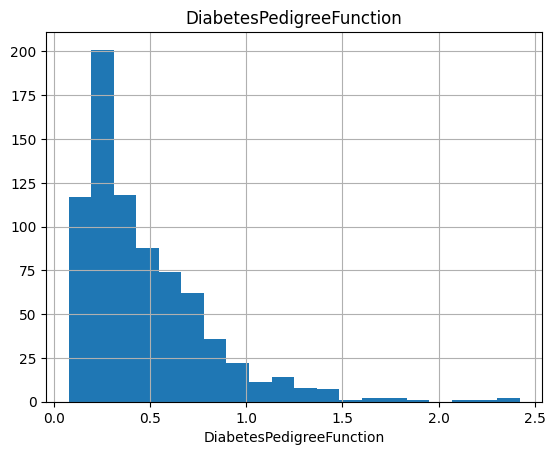

     count       mean        std   min    5%   10%   20%   30%   40%   50%  \
Age  768.0  33.240885  11.760232  21.0  21.0  22.0  23.0  25.0  27.0  29.0   

      60%   70%   80%   90%   95%   99%   max  
Age  33.0  38.0  42.6  51.0  58.0  67.0  81.0  



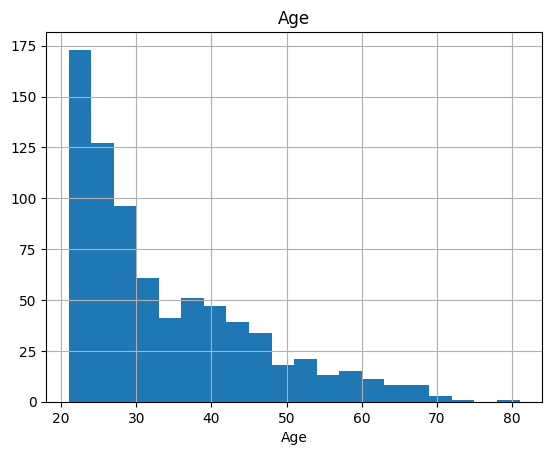

In [ ]:
for col in num_cols:
    pp.numSummary(col,plot=True)

         Outcome      Ratio
Outcome                    
0            500  65.104167
1            268  34.895833
##########################################


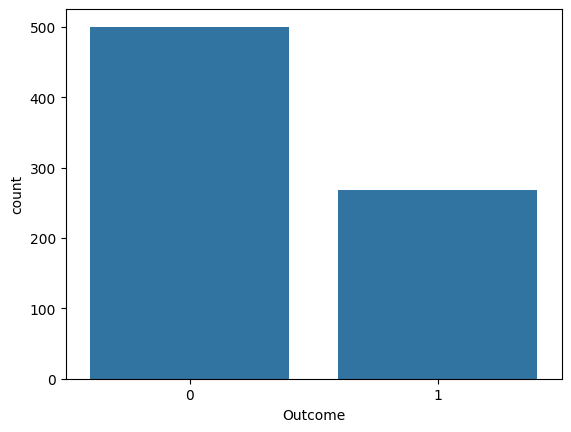

In [ ]:
for col in cat_cols:
    pp.catSummary(col,plot=True)

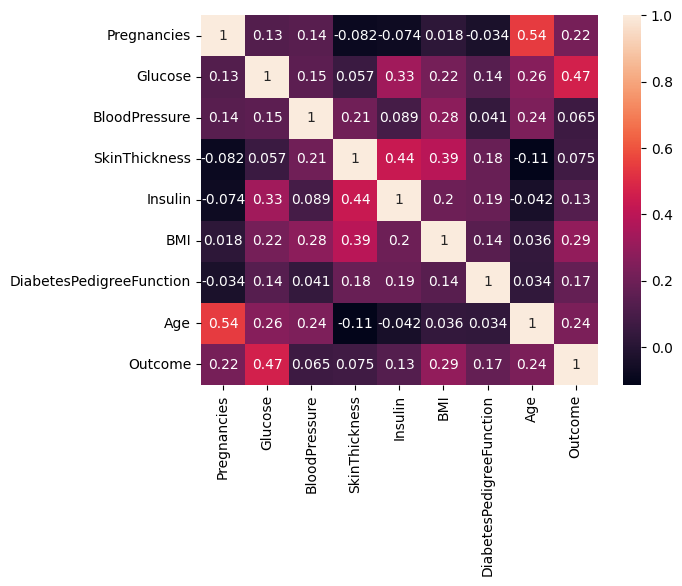

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Training

In [97]:
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target

In [15]:
models = [
      ('LR', LogisticRegression()),
      ('KNN', KNeighborsClassifier()),
      ('CART', DecisionTreeClassifier()),
      ('RF', RandomForestClassifier()),
      ("XGB", XGBClassifier(objective='reg:squarederror')),
      ("LightGBM", LGBMClassifier(force_col_wise=True,verbose=-1))
          ]

In [16]:
for name, model in models:

    cv_results = cross_validate(model, X, y.values.ravel(), cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}\n")

########## LR ##########
Accuracy: 0.7696
Auc: 0.8301
Recall: 0.5635
Precision: 0.7182
F1: 0.6295

########## KNN ##########
Accuracy: 0.724
Auc: 0.7486
Recall: 0.5303
Precision: 0.6225
F1: 0.5705

########## CART ##########
Accuracy: 0.7162
Auc: 0.6851
Recall: 0.5822
Precision: 0.6001
F1: 0.5873

########## RF ##########
Accuracy: 0.7566
Auc: 0.8224
Recall: 0.5673
Precision: 0.6882
F1: 0.6186

########## XGB ##########
Accuracy: 0.7371
Auc: 0.7757
Recall: 0.6122
Precision: 0.6296
F1: 0.6171

########## LightGBM ##########
Accuracy: 0.7474
Auc: 0.799
Recall: 0.6045
Precision: 0.6483
F1: 0.6241



## Model Tuning

### Random Forest

In [26]:
def objective(trial):
    # Hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])



    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling the data

    for col in X_train.columns:
        scaler = StandardScaler().fit(X_train[[col]])
        X_train[col] = scaler.transform(X_train[[col]])

    for col in X_test.columns:
        scaler = StandardScaler().fit(X_test[[col]])
        X_test[col] = scaler.transform(X_test[[col]])

    # Model instantiation
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42,
    )

    # Fitting the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_test, y_val_pred)



    return val_accuracy


In [28]:
study = optuna.create_study(direction='maximize', pruner=MedianPruner())
study.optimize(objective, n_trials=100)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-08-27 08:47:16,588] A new study created in memory with name: no-name-302e0c5a-1507-4f48-a6d3-fdef1cfb5c94
[I 2024-08-27 08:47:18,335] Trial 0 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 537, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 0 with value: 0.7662337662337663.
[I 2024-08-27 08:47:19,394] Trial 1 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 455, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 1 with value: 0.7792207792207793.
[I 2024-08-27 08:47:20,445] Trial 2 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 527, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 7, 'bootstrap': True}. Best is trial 1 with value: 0.7792207792207793.
[I 2024-08-27 08:47:20,933] Trial 3 finished with value: 0.7467532467532467 and parameters: {'n_estimators': 182, 'max_depth': 9, 'min_samples_split

Number of finished trials: 100
Best trial: {'n_estimators': 142, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 2, 'bootstrap': True}


### Logistic Regression

In [74]:
def objective(trial):
    # Hyperparameters to tune
    C = trial.suggest_float('C', 0.01, 10.0, log=True)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'sag', 'newton-cg'])
    penalty = trial.suggest_categorical('penalty', ['l2', 'none'])
    max_iter = trial.suggest_int('max_iter', 10, 1000)

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling the data
    for col in X_train.columns:
        scaler = StandardScaler().fit(X_train[[col]])
        X_train[col] = scaler.transform(X_train[[col]])

    for col in X_test.columns:
        scaler = StandardScaler().fit(X_test[[col]])
        X_test[col] = scaler.transform(X_test[[col]])

    # Model instantiation
    model = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        random_state=42,
    )

    # Fitting the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_test, y_val_pred)

    return val_accuracy


In [75]:
study = optuna.create_study(direction='maximize', pruner=MedianPruner())
study.optimize(objective, n_trials=100)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-08-27 09:17:37,191] A new study created in memory with name: no-name-bdbb801f-5521-429a-ade2-f494bb017a05
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[I 2024-08-27 09:17:37,295] Trial 0 finished with value: 0.7792207792207793 and parameters: {'C': 0.020706197780630268, 'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 115}. Best is trial 0 with value: 0.7792207792207793.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[I 2024-08-27 09:17:37,398] Trial 1 finished with value: 0.7792207792207793 and parameters: {'C': 0.11604386738865778, 'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 754}. Best is trial 0 with value: 0.7792207792207793.
[I 2024-08-27 09:17:37,491] Trial 2 finished with value: 0.7792207792207793 and parameters: {

Number of finished trials: 100
Best trial: {'C': 0.016578805748086484, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 334}


## Final Model

In [76]:
best_rf_params={'n_estimators': 142, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 2, 'bootstrap': True}

In [77]:
best_lr_params={'C': 0.016578805748086484, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 334}

In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [96]:
model1=RandomForestClassifier(**best_rf_params,random_state=42)
model2=LogisticRegression(**best_lr_params,random_state=42)

In [99]:
model1.fit(X_scaled,y)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=142, random_state=42)

In [106]:
y_pred = model1.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")
print(f"precision: {precision_score(y, y_pred)}")
print(f"recall: {recall_score(y, y_pred)}")
print(f"f1: {f1_score(y, y_pred)}")

Accuracy: 0.8203125
precision: 0.8186274509803921
recall: 0.6231343283582089
f1: 0.7076271186440678


# Save Model and Scaler

In [102]:
import joblib

In [103]:
dump(model1, 'model.joblib')
dump(scaler, 'scaler.joblib')

print("Model and scaler saved successfully")

Model and scaler saved successfully